## Итоговая работа 

Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (т.е. абонентов). Данные доступны тут - https://drive.google.com/open?id=1ArslqEEno2hrr5tAs25P0JN0P-coLcFD
Перечень полей:

• state – штат;

• account length – абонентский стаж; 

• area code – код региона;

• phone number – номер телефона;

• international plan – тарифный план для международных звонков;

• voice mail plan – тарифный план для голосовой почты;

• number vmail messages – количество сообщений голосовой почты;

• total day minutes – общая длительность звонков в дневное время (мин);

• total day calls – общее количество звонков в дневное время;

• total day charge – общая стоимость звонков в дневное время;

• total eve minutes – общая длительность звонков в вечернее время (мин);

• total eve calls – общее количество звонков в вечернее время;

• total eve charge – общая стоимость звонков в вечернее время;

• total night minutes – общая длительность звонков в ночное время (мин);

• total night calls – общее количество звонков в ночное время;

• total night charge – общая стоимость звонков в ночное время;

• total intl minutes – общая длительность международных звонков (мин);

• total intl calls – общее количество международных звонков;

• total intl charge – общая стоимость международных звонков;

• number customer service calls – количество звонков в службу поддержки.

• churned – покинул ли клиент компанию

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline


df= pd.read_csv('churn.csv')
df.head(16)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


**1. Построить гистограмму количества звонков в техническую поддержку**

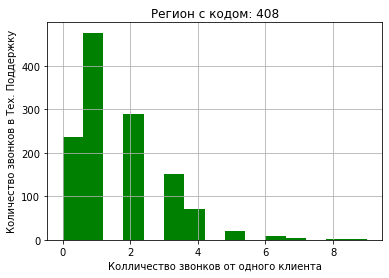

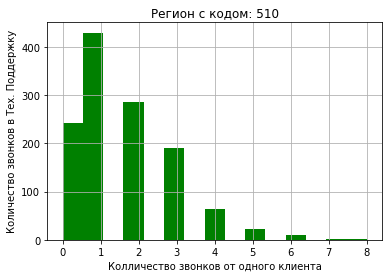

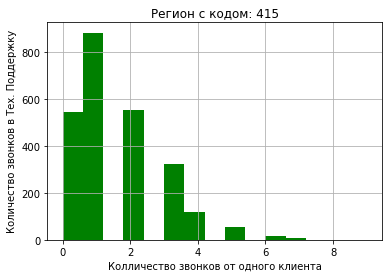

In [23]:
areas = list(set(df.area_code))
for area in areas:
    n, bins, patches = plt.hist(df[df['area_code']==area]['number_customer_service_calls'], 15, facecolor='g')
    plt.xlabel('Колличество звонков от одного клиента')
    plt.ylabel('Количество звонков в Тех. Поддержку')
    plt.title('Регион с кодом: '+ str(area))
    plt.grid(True)
    plt.show()

**2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)**

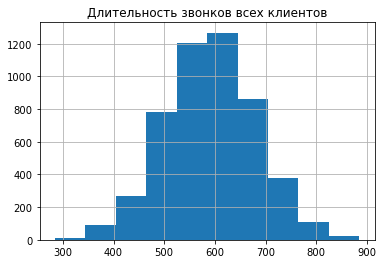

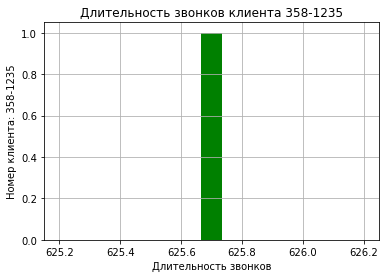

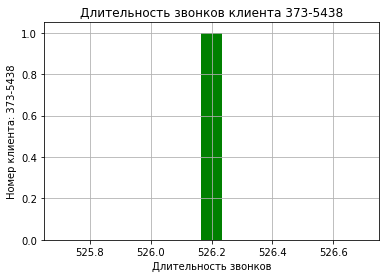

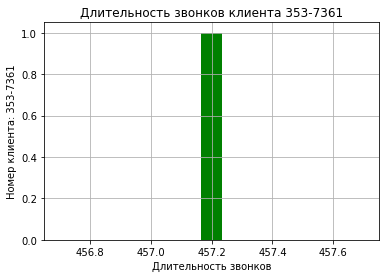

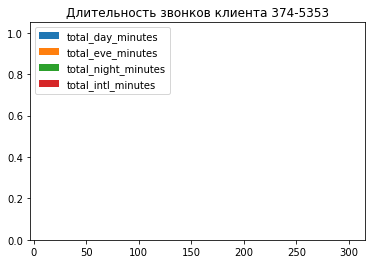

In [5]:
'''
total day calls – общее количество звонков в дневное время;
total eve calls – общее количество звонков в вечернее время;
total night calls – общее количество звонков в ночное время;
total intl calls – общее количество международных звонков;
'''
df['total_min'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
plt.hist(df['total_min'])
plt.title('Длительность звонков всех клиентов')
plt.grid(True)
plt.show()


clients = list(set(df.phone_number))
for client in clients[10:13]:
    n, bins, patches = plt.hist(df[df['phone_number']==client]['total_min'], 15, facecolor='g')
    plt.xlabel('Длительность звонков')
    plt.ylabel('Номер клиента: '+client)
    plt.title('Длительность звонков клиента '+client)
    plt.grid(True)
    plt.show()
    

times=['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']

for time in times:
    plt.hist(df[df['phone_number']==clients[15]][time],label=time)

plt.title('Длительность звонков клиента '+clients[15])    
plt.legend()
plt.show()




**3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку**

Коэффициент корреляции Пирсона: -0.011407910827441414


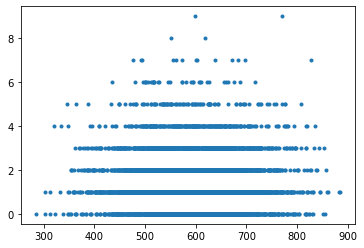

In [6]:
from scipy.stats import pearsonr
x = df['total_min']
y = df['number_customer_service_calls']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [7]:
def pearsonr(x, y):
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(xi*xi for xi in x)
  sum_y_sq = sum(yi*yi for yi in y)
  psum = sum(xi*yi for xi, yi in zip(x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

In [8]:
pearsonr(x,y)

-0.011407910827491027

**4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента**

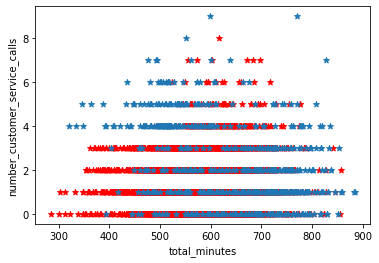

In [57]:
'''
number customer service calls – количество звонков в службу поддержки.
'''
#Client leave from comp
plt.scatter(df[df['churned']==False]['total_min'], df[df['churned']==False]['number_customer_service_calls'], marker='*',color='r')

#Client stay in comp
plt.scatter(df[df['churned']==True]['total_min'], df[df['churned']==True]['number_customer_service_calls'], marker='*')



plt.xlabel('total_minutes')
plt.ylabel('number_customer_service_calls')
plt.show()

**5. Вывести top-5 самых много и самых мало говорящих клиентов**

In [77]:
data=df.sort_values(by='total_min', ascending=False)
print('Топ 5 самых много говорящих клиентов: \n',data.phone_number.head(),
     '\n\n\nТоп 5 самых мало говорящих клиентов: \n',data.phone_number.tail())

print('\n\nБез индекса:\nТоп 5 самых много говорящих клиентов: \n',data.phone_number.values[:5],
     '\n\n\nТоп 5 самых мало говорящих клиентов: \n',data.phone_number.values[-5:])

Топ 5 самых много говорящих клиентов: 
 985     345-9140
289     352-6976
3205    345-3787
4991    410-3888
4271    370-4667
Name: phone_number, dtype: object 


Топ 5 самых мало говорящих клиентов: 
 992     375-8934
1986    405-9233
3779    362-8044
1233    380-5246
648     331-3174
Name: phone_number, dtype: object


Без индекса:
Топ 5 самых много говорящих клиентов: 
 ['345-9140' '352-6976' '345-3787' '410-3888' '370-4667'] 


Топ 5 самых мало говорящих клиентов: 
 ['375-8934' '405-9233' '362-8044' '380-5246' '331-3174']


**6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата**

In [129]:
states = list(set(df.state))
for state in states:
    print(state+':\n\nДоля оттока клиентов: ',df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[0]*100,'%',
          '\nСредняя стоимость минуты дневного времени разговора:',sum(df[ (df.state == state)].total_day_minutes/df[ (df.state == state)].total_day_charge)/df[df.state == state].count().values[0],'\n')
    

MS:

Доля оттока клиентов:  17.17171717171717 % 
Средняя стоимость минуты дневного времени разговора: 5.882220421276362 

IA:

Доля оттока клиентов:  11.594202898550725 % 
Средняя стоимость минуты дневного времени разговора: 5.882060812012251 

ID:

Доля оттока клиентов:  11.76470588235294 % 
Средняя стоимость минуты дневного времени разговора: 5.882239365363155 

MO:

Доля оттока клиентов:  12.903225806451612 % 
Средняя стоимость минуты дневного времени разговора: 5.882092171802528 

NY:

Доля оттока клиентов:  17.543859649122805 % 
Средняя стоимость минуты дневного времени разговора: 5.882226174852966 

MT:

Доля оттока клиентов:  21.21212121212121 % 
Средняя стоимость минуты дневного времени разговора: 5.882333027748264 

UT:

Доля оттока клиентов:  14.285714285714285 % 
Средняя стоимость минуты дневного времени разговора: 5.88227837942326 

CT:

Доля оттока клиентов:  16.161616161616163 % 
Средняя стоимость минуты дневного времени разговора: 5.882295627575001 

VA:

Доля оттока кли

**7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark**

In [131]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)**

In [140]:
data=df
data=data.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','total_min'])

data.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [142]:
data = pd.get_dummies(data, ['state'])
data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [143]:
data.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [144]:
# Формируем признаки и целевую переменную
X, y = data[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'number_customer_service_calls', 'total_intl_minutes',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], data['churned']

In [145]:
# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [146]:
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,number_customer_service_calls,total_intl_minutes,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2590,129,177.3,211.8,240.2,3,9.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610,156,162.6,260.2,214.7,0,10.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,113,44.9,134.2,168.4,1,13.3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3854,87,156.0,160.5,206.6,4,7.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,83,195.0,210.5,180.6,0,11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas**

In [147]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке**

In [148]:
logistic = LogisticRegression()

In [149]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [150]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [154]:
accuracy_score(y_test, logistic.predict(X_test))

0.857

In [155]:
precision_score(y_test, logistic.predict(X_test))

0.6666666666666666

In [156]:
recall_score(y_test, logistic.predict(X_test))

0.10596026490066225

In [157]:
f1_score(y_test, logistic.predict(X_test))

0.18285714285714286

In [158]:
accuracy_score(y_test, tree.predict(X_test))

0.864

In [159]:
precision_score(y_test, tree.predict(X_test))

0.5539568345323741

In [160]:
recall_score(y_test, tree.predict(X_test))

0.5099337748344371

In [161]:
f1_score(y_test, tree.predict(X_test))

0.5310344827586208

In [166]:
## Метрики для SVC
accuracy_score(y_test, svc_model.predict(X_test))

0.849

In [167]:
precision_score(y_test, svc_model.predict(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [168]:
recall_score(y_test, svc_model.predict(X_test))

0.0

In [169]:
f1_score(y_test, svc_model.predict(X_test))

0.0